# Multicolinearity

### Task#1

a. Load relevant librraies

b. Load 401ksybs.xls as a pandas dataframe.

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

`statsmodels.api` is a Python library that helps you analyze data using **statistical models** like regression and time series. It's great for understanding relationships between variables and running hypothesis tests.


**from statsmodels.stats.outliers_influence import variance_inflation_factor**


This line imports the variance_inflation_factor (VIF) function from the statsmodels library. It's used to measure multicollinearity between the independent (predictor) variables in a regression model.

In [7]:
pensions = pd.read_excel('https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/401ksubs.xls')

### Task# 2

a. Create a correlation matrix on this dataset.

b. Do you observe any multicolinearity problem? Identify those fields.

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt

In [9]:
pensions.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [10]:
corr = pensions.corr()

corr

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
e401k,1.000000,0.268178,0.080843,-0.027641,0.031526,0.012015,0.143950,0.769170,0.118643,0.206618,0.017526
inc,0.268178,1.000000,0.362008,-0.069871,0.105638,0.110170,0.376586,0.270833,0.364354,0.940161,0.087305
marr,0.080843,0.362008,1.000000,-0.363950,0.059047,0.564814,0.075039,0.085636,0.116925,0.280060,0.054500
male,-0.027641,-0.069871,-0.363950,1.000000,-0.120297,-0.320678,-0.018132,-0.024949,-0.036361,-0.053715,-0.116235
age,0.031526,0.105638,0.059047,-0.120297,1.000000,-0.030536,0.203906,0.025977,0.238557,0.097584,0.992619
fsize,0.012015,0.110170,0.564814,-0.320678,-0.030536,1.000000,-0.031506,0.014296,-0.043629,0.079570,-0.055924
nettfa,0.143950,0.376586,0.075039,-0.018132,0.203906,-0.031506,1.000000,0.187392,0.345917,0.407568,0.203703
p401k,0.769170,0.270833,0.085636,-0.024949,0.025977,0.014296,0.187392,1.000000,0.153033,0.222113,0.015740
pira,0.118643,0.364354,0.116925,-0.036361,0.238557,-0.043629,0.345917,0.153033,1.000000,0.322805,0.233543
incsq,0.206618,0.940161,0.280060,-0.053715,0.097584,0.079570,0.407568,0.222113,0.322805,1.000000,0.082991


<Axes: >

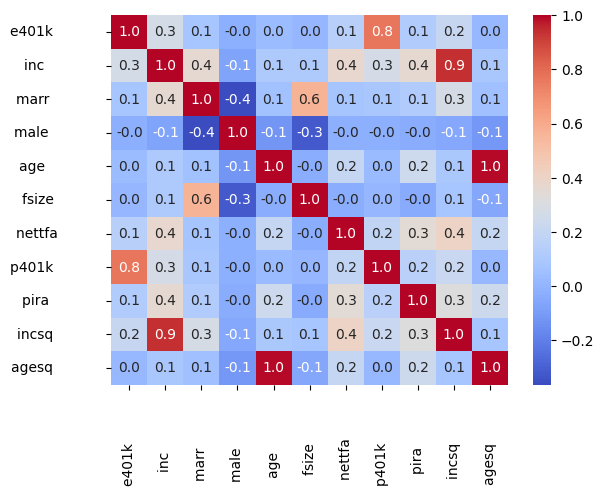

In [11]:
sn.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm')


### Task# 3

a. Compute VIF on this dataset.

b. Do you observe any multicolinearity problem?

c. Does your VIF scores matches with your hypothesis from correlation matrix?

In [12]:
# It adds a new column of 1s to your dataset, which represents the intercept (also called the "constant") in a regression model.

X = add_constant(pensions)
X

,const,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,1.0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1.0,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,1.0,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,1.0,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,1.0,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809
...,...,...,...,...,...,...,...,...,...,...,...,...
9270,1.0,0,58.428,1,0,33,4,-1.200,0,0,3413.8310,1089
9271,1.0,0,24.546,0,1,37,3,2.000,0,0,602.5061,1369
9272,1.0,0,38.550,1,0,33,3,-13.600,0,1,1486.1020,1089
9273,1.0,0,34.410,1,0,57,3,3.550,0,0,1184.0480,3249


In [13]:
VIF = pd.DataFrame()
VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["variable"] = X.columns
VIF

,VIF,variable
0,290.278153,const
1,2.513639,e401k
2,10.602930,inc
3,1.917809,marr
4,1.203310,male
5,75.247086,age
6,1.655026,fsize
7,1.329750,nettfa
8,2.504833,p401k
9,1.291367,pira


Variance Inflation Factor (VIF) is a tool used to detect multicollinearity in your dataset, which happens when some features are highly correlated with each other.

A high VIF means that a variable is too strongly related to other variables, which can make your model less reliable.

In above case, the table shows that variables like `inc` (income) and `incsq` (income squared) have a high VIF, indicating they are highly correlated. Similarly, `age` and `agesq` (age squared) are also closely related, with very high VIF scores.



### Task# 4

a. How would you cater to this problem?

To reduce multicollinearity, it's suggested that you drop one variable from each highly correlated pair, such as either `inc` or `incsq`, and either `age` or `agesq`.

In [15]:
print(pensions.columns)


Index(['e401k           ', 'inc             ', 'marr            ',
       'male            ', 'age             ', 'fsize           ',
       'nettfa          ', 'p401k           ', 'pira            ',
       'incsq           ', 'agesq           '],
      dtype='object')


In [16]:
pensions.drop(['agesq           ', 'incsq           '], axis=1, inplace=True)

In [17]:
print(pensions.columns)

Index(['e401k           ', 'inc             ', 'marr            ',
       'male            ', 'age             ', 'fsize           ',
       'nettfa          ', 'p401k           ', 'pira            '],
      dtype='object')


## Task# 5

a. Compute vif again on pensions data after droping high multicolinear points.

b. Do you observe any change in VIF values?

In [18]:
X = add_constant(pensions)
X

,const,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira
0,1.0,0,13.170,0,0,40,1,4.575,0,1
1,1.0,1,61.230,0,1,35,1,154.000,1,0
2,1.0,0,12.858,1,0,44,2,0.000,0,0
3,1.0,0,98.880,1,1,44,2,21.800,0,0
4,1.0,0,22.614,0,0,53,1,18.450,0,0
...,...,...,...,...,...,...,...,...,...,...
9270,1.0,0,58.428,1,0,33,4,-1.200,0,0
9271,1.0,0,24.546,0,1,37,3,2.000,0,0
9272,1.0,0,38.550,1,0,33,3,-13.600,0,1
9273,1.0,0,34.410,1,0,57,3,3.550,0,0


In [19]:
VIF = pd.DataFrame()
VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["variable"] = X.columns
VIF

,VIF,variable
0,26.412709,const
1,2.479017,e401k
2,1.517643,inc
3,1.802922,marr
4,1.201691,male
5,1.100297,age
6,1.544830,fsize
7,1.277926,nettfa
8,2.504333,p401k
9,1.278003,pira


# Heteroscedasticity

We will come back to this exercise when we know enough about Linear Regression.

**Heteroscedasticity** means that the **spread or variability of data is not consistent** across the range of values.

In simple terms:
It means that **some parts of your data vary a lot**, while **others vary very little**—the spread is **uneven**. For example, in a salary dataset, people with low incomes may have similar values, while high earners may have a wide range, causing heteroscedasticity.

This can be a problem in statistical models like regression, because it can lead to **biased or inefficient results**.


# Normality

### Task# 5

a. Read data from https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/CAR%20DETAILS.csv

b. Create a histogram on Selling price field.

d. Is this field following proper normal distribution.



In [28]:
car = pd.read_csv('https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/CAR%20DETAILS.csv')
car

,selling_price,km_driven,fuel,seller_type,transmission,owner
0,60000,70000,Petrol,Individual,Manual,First Owner
1,135000,50000,Petrol,Individual,Manual,First Owner
2,600000,100000,Diesel,Individual,Manual,First Owner
3,250000,46000,Petrol,Individual,Manual,First Owner
4,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner
4336,409999,80000,Diesel,Individual,Manual,Second Owner
4337,110000,83000,Petrol,Individual,Manual,Second Owner
4338,865000,90000,Diesel,Individual,Manual,First Owner


Text(0, 0.5, 'Frequency')

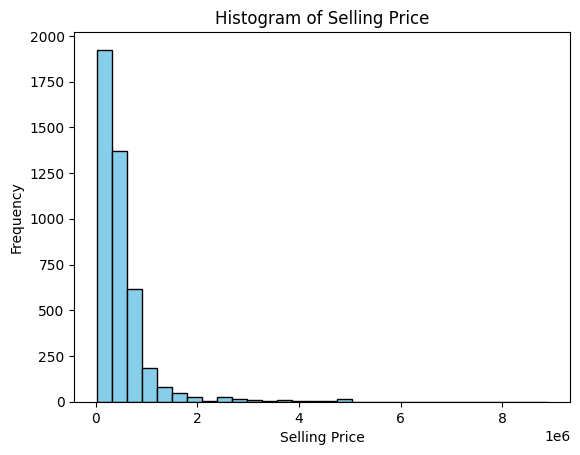

In [29]:
plt.hist(car['selling_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')

### Task# 6

*For Normal Distribution, Skewness = 0, Kurtosis = 3*

a. Compute skewness and kurtosis of selling_price field.

b. Is this field following normal distribution?

In [31]:
# Compute skewness and kurtosis
skewness = car['selling_price'].skew()
kurtosis = car['selling_price'].kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Check for normal distribution
if skewness == 0 and kurtosis == 3:
  print("The 'selling_price' field approximately follows a normal distribution.")
else:
  print("The 'selling_price' field does not follow a normal distribution.")


Skewness: 4.892021472306356
Kurtosis: 37.08754263212727
The 'selling_price' field does not follow a normal distribution.


### Task# 7

a. Apply log transformation on selling price field and create log_selling_price.

b. Compute skewness and kurtosis

c. Create a histogram on log_selling_price.

d. Do you think normality has been achieved?

In [32]:
# Apply log transformation
car['log_selling_price'] = np.log1p(car['selling_price'])

In [33]:
# Compute skewness and kurtosis
skewness = car['log_selling_price'].skew()
kurtosis = car['log_selling_price'].kurt()


In [34]:
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 0.06017265586710223
Kurtosis: 0.26919962096875993


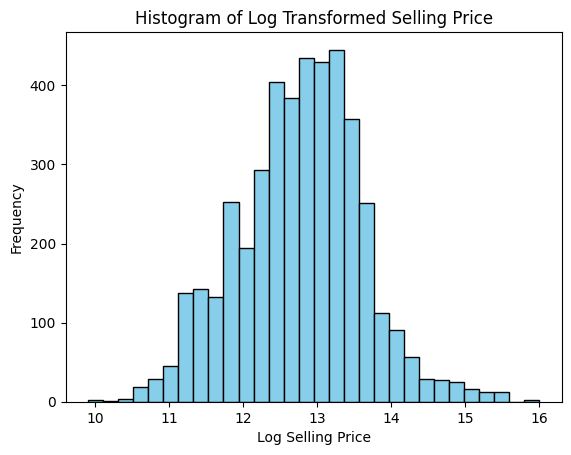

In [35]:
# Create a histogram
plt.hist(car['log_selling_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Log Transformed Selling Price')
plt.xlabel('Log Selling Price')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Check for normal distribution (although not perfectly 0 and 3, it's closer)
if abs(skewness) < 0.5 and abs(kurtosis - 3) < 0.5 :
  print("The 'log_selling_price' field approximately follows a normal distribution.")
else:
  print("The 'log_selling_price' field does not follow a normal distribution.")

The 'log_selling_price' field does not follow a normal distribution.


### Task# 7

a. Read data from: https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/ceosal1.xls

b. Create histogram on 'salary', and 'lsalary' field.

c. What do you observe?

In [20]:
ceosal = pd.read_excel('https://raw.githubusercontent.com/ayeshaamjad0828/Data-Science-with-Python-101/main/Datasets/ceosal1.xls')
ceosal.head()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.0,14.1,106.4,191,1,0,0,0,6.998509,10.225390
1,1001,32,9958.0,10.9,-30.6,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.9,23.5,-16.3,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.0,5.9,-25.7,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.2,13.8,-3.0,56,1,0,0,0,7.221105,9.988894


In [23]:
print(ceosal.columns)


Index(['salary                   ', 'pcsalary                 ',
       'sales                    ', 'roe                      ',
       'pcroe                    ', 'ros                      ',
       'indus                    ', 'finance                  ',
       'consprod                 ', 'utility                  ',
       'lsalary                  ', 'lsales                   '],
      dtype='object')


Text(0, 0.5, 'Frequency')

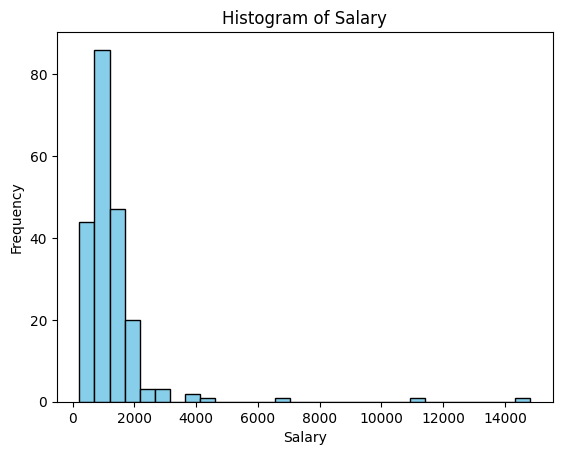

In [24]:
plt.hist(ceosal['salary                   '], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

The spread of salary values is uneven—most people earn low salaries, but a few earn very high salaries. This uneven spread is called heteroscedasticity, which means the data has changing variability.

Text(0, 0.5, 'Frequency')

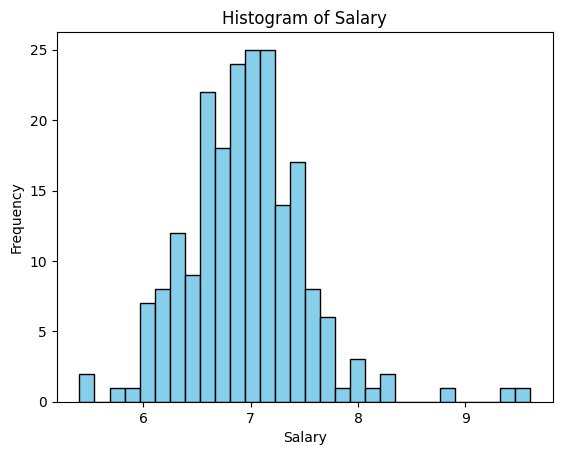

In [25]:
plt.hist(ceosal['lsalary                  '], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

After applying a log transformation, the salary values are spread more evenly. This is called homoscedasticity, which means the data has constant or stable variability, making it easier to analyze and model.

# Class Imbalance

### Task# 8

a. Read xlsx data from https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/ChurnData.xlsx

b. Create a bar graph on 'Churn' field.

c. Do you think this data suffers from class imbalance problem?




In [26]:
churn = pd.read_excel('https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/ChurnData.xlsx')
churn.head()

,Phone,State,Area Code,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Int'l Plan,VMail Plan,Churn
0,382-4657,KS,415,128,25,265.1,197.4,244.7,10.0,1,...,45.07,99,16.78,91,11.01,3,2.70,0,1,0
1,371-7191,OH,415,107,26,161.6,195.5,254.4,13.7,1,...,27.47,103,16.62,103,11.45,3,3.70,0,1,0
2,358-1921,NJ,415,137,0,243.4,121.2,162.6,12.2,0,...,41.38,110,10.30,104,7.32,5,3.29,0,0,0
3,375-9999,OH,408,84,0,299.4,61.9,196.9,6.6,2,...,50.90,88,5.26,89,8.86,7,1.78,1,0,0
4,330-6626,OK,415,75,0,166.7,148.3,186.9,10.1,3,...,28.34,122,12.61,121,8.41,3,2.73,1,0,0


Text(0, 0.5, 'Frequency')

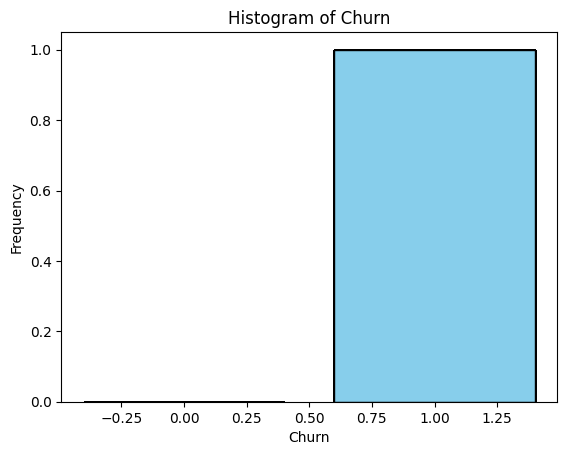

In [27]:
plt.bar(churn['Churn'], churn['Churn'], color='skyblue', edgecolor='black')
plt.title('Histogram of Churn')
plt.xlabel('Churn')
plt.ylabel('Frequency')

The histogram of the "Churn" variable clearly indicates a class imbalance issue within the dataset. It shows that nearly all instances fall under a single class, with the other class either entirely absent or significantly underrepresented.